### Grover's Search Algorithm
Grover's algorithm is a quantum algorithm to search through an unstordered data structure in O(root(N)) time, as compared to the O(N) time of classical algorithms.

In this demonstration, we use an oracle, a function while negates the phases of only those states which we desire to find through the algorithm.

In [ ]:
!pip install qiskit
!pip install 'qiskit[visualization]'

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, IBMQ, Aer, assemble, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_bloch_vector, plot_bloch_multivector, plot_histogram
from qiskit.providers.basicaer import QasmSimulatorPy

In [ ]:
def applyHardamard(circuit, n):
  for qubit in range(n):
    circuit.h(qubit)

def applyXGate(circuit, n):
  for qubit in range(n):
    circuit.x(qubit)

def getOracleGate(n):
  # Let the oracle be a gate that negates the state |11..1>
  # Hence in our example the oracle is a multi controlled Z gate

  oracle = QuantumCircuit(n)
  # Apply a multi-controlled-Z gate to only change the sign of the |11..1> state
  oracle.h(n-1)
  oracle.mct(list(range(n-1)), n-1)  # multi-controlled-toffoli
  oracle.h(n-1)

  oracleGate = oracle.to_gate()
  oracleGate.name = "Uf"

  return oracleGate

In [ ]:
def getReflectionGate(n):
  gate = QuantumCircuit(n)

  # Apply transformation |s> -> |00..0> -> |11..1> (H and X gates)
  applyHardamard(gate, n)
  applyXGate(gate, n)

  # Apply a multi-controlled-Z gate to only change the sign of the |11..1> state
  gate.h(n-1)
  gate.mct(list(range(n-1)), n-1)  # multi-controlled-toffoli
  gate.h(n-1)

  # Apply transformation |11..1> -> |00..0> -> |s>
  applyXGate(gate, n)
  gate.x(0)
  gate.z(0)
  gate.x(0)
  gate.z(0)

  applyHardamard(gate, n)

  # Return the circuit as a gate
  Rs = gate.to_gate()
  Rs.name = "Rs"
  return Rs

In [ ]:
def GroversAlgorithm(circuit, oracle, Rs, n):
  # Number of iterations t
  t = ((math.pi)*(math.sqrt(n)))/4 - 0.5
  t = math.floor(t)

  # Apply Oracle and Rs gates t times to approach the desired pure state of the search
  for iter in range(t):
    circuit.append(oracle, list(range(n)))
    circuit.append(Rs, list(range(n)))

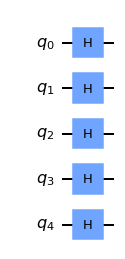

In [ ]:
n=10 # Number of qubits

# Creating the quantum circuit
circuit = QuantumCircuit(n)

# Initializing the n qubits each into the |+) state
applyHardamard(circuit, n)

circuit.draw('mpl')

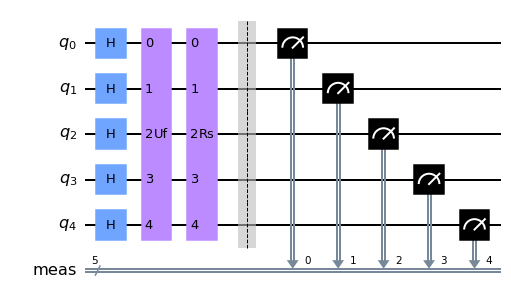

In [ ]:
# Oracle gate
oracle = getOracleGate(n)

# Reflection about S gate
Rs = getReflectionGate(n)

# Final function to convert our circuit into a pure state which is the result of the unstructured search
GroversAlgorithm(circuit, oracle, Rs, n)

circuit.measure_all()
circuit.draw('mpl')

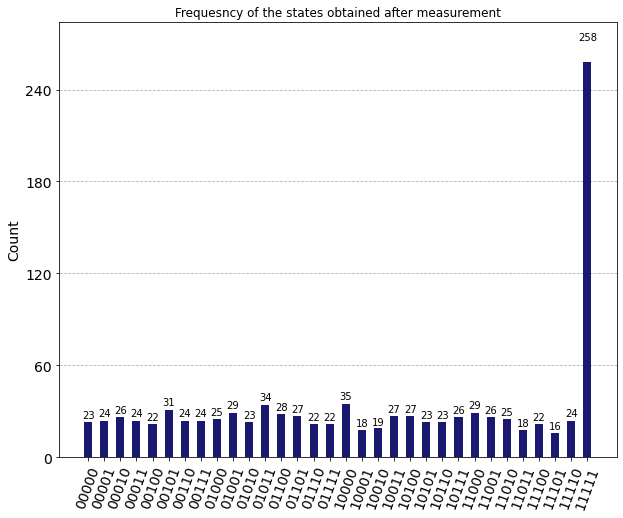

In [ ]:
# Experimenting to obtain the required pure state
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts, color=['midnightblue'], title="Frequesncy of the states obtained after measurement", figsize=(10,8))